In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

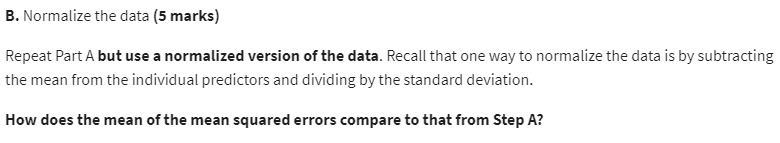

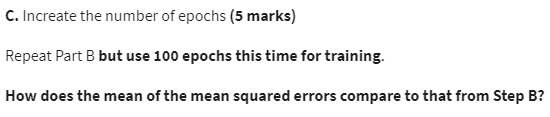

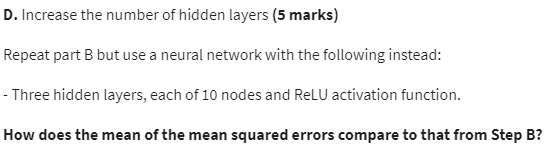

# Prepare data

In [2]:
# Read data
from sklearn.model_selection import train_test_split
data= pd.read_csv('concrete_data.csv')

# Split data
X = data.drop(['Strength'],axis =1)
y = data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Processing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_B = scaler.transform(X_train)
X_test_B = scaler.transform(X_test)

# Build model

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(X.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train & Validate model

In [5]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50

23/23 [==============================] - 1s 10ms/step - loss: 37169.0859 - val_loss: 21611.9648
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 14481.5605 - val_loss: 6844.0024
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 4359.7476 - val_loss: 1903.7429
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 1637.0314 - val_loss: 1304.3452
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1328.7325 - val_loss: 1151.5220
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 1168.5883 - val_loss: 1007.6815
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 1038.4042 - val_loss: 894.6850
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 927.5185 - val_loss: 798.3696
Epoch 9/50
23/23 [==============================] - 0s 4ms/step - loss: 828.4800 - val_loss: 712.6843
Epoch 10/50
23/23 [==============================] - 0s 5ms/step

# Report

In [6]:
# list of mse on test set
mse_history = model.history.history['val_loss']

In [7]:
# Calculate mean and standard deviation
print(f'Mean of MSEs: {np.mean(mse_history)}')
print(f'Standard Deviation of MSEs: {np.std(mse_history)}')

Mean of MSEs: 969.6998300170899
Standard Deviation of MSEs: 3100.4891626819945


Both mean and standard deviation decrease significantly compare to A